### Point Pattern Analysis - nearest neighbor analysis

This notebook will demostrate the nearest neighbor statistic's sampling distribution, and how we can use Complete Spatial Randomness to conduct hypothesis testing.

We will be using a python package called `pointpats` which is a sub-module of Python Spatial Analysis Library (PySAL).


In [1]:
import pointpats
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern
import libpysal as ps
import matplotlib.pyplot as plt
import numpy as np

Consider this is our observed events and their loctaions.

In [2]:
observed = np.array([[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]])

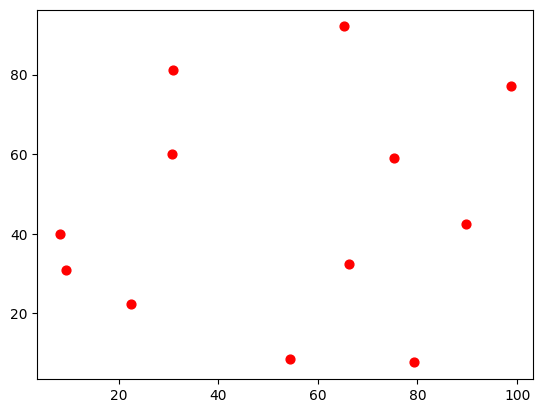

In [3]:
plt.scatter(observed[:,0],observed[:,1],s=40,color='red',)

In `pointpats`, you can easily calculate nearest neighor distance very easily. The below result is the same as we have on the slide. The first element an array of nearest neighors indices. Note that in python index starts with zero, so the index is off by one compared to the ones on the slide. The second element is an array of distance from each event to its nearest event.

In [4]:
pp = PointPattern(observed)
pp.knn()

(array([[ 9],
        [ 3],
        [ 4],
        [ 7],
        [ 2],
        [ 9],
        [11],
        [ 3],
        [ 5],
        [ 5],
        [ 5],
        [ 6]]),
 array([[25.59050019],
        [15.64542745],
        [21.11125292],
        [ 8.99587128],
        [21.11125292],
        [21.93729473],
        [24.81289987],
        [ 8.99587128],
        [29.76387072],
        [21.93729473],
        [34.63124168],
        [24.81289987]]))

And we can calculate the average nearest neighbor distance as:

In [5]:
observed_ann = pp.knn()[1].mean()
observed_ann

21.612139802089246

Then we try to simulate some random patterns as the baseline to comapre against. 

First we create a window

In [6]:
ext_square = [(0,0), (0,100), (100,100), (100, 0)]
window_square = Window(ext_square)

Then we generate random points following a Poisson Point Process.

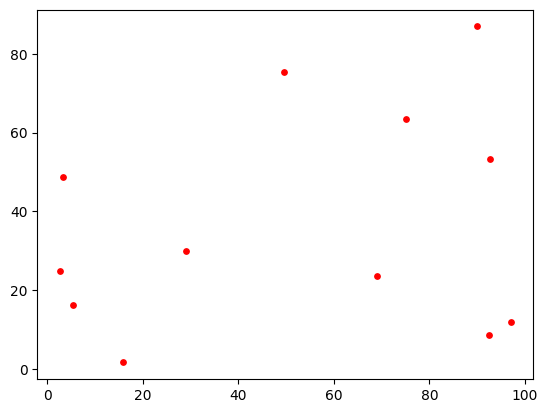

In [7]:
# n is the number of points
# sample is number of random patterns we generate, we just do 1 pattern.
samples = PoissonPointProcess(window_square, n=12, samples=1)

#get the coordinates from the PoissonPointProcess function.
pp_pcp = samples.realizations[0]
plt.scatter(pp_pcp[:,0],pp_pcp[:,1],s=15,color='red')

Calcualte ANND for each random pattern

In [8]:
pp = PointPattern(pp_pcp)
pp.knn()

(array([[ 9],
        [ 9],
        [ 6],
        [10],
        [ 9],
        [ 6],
        [ 5],
        [ 6],
        [ 3],
        [ 1],
        [ 3],
        [ 1]]),
 array([[26.79532428],
        [ 9.11686077],
        [27.75869435],
        [ 5.62917903],
        [23.94820159],
        [20.25354371],
        [20.25354371],
        [28.34052548],
        [27.80993129],
        [ 9.11686077],
        [ 5.62917903],
        [17.91492018]]))

In [9]:
pp.knn()[1].mean()

18.547230348943653

Next, remember what we talked about permutation test? We will generate random pattern which will serve as our null sampling distribution. Here, we just repeat the previous step 1,000 times.

In [10]:
ann_list = []
np.random.seed(222)
for i in range(1000):
    
    samples = PoissonPointProcess(window_square, 12, 1)
    pp_pcp = samples.realizations[0]
    pp = PointPattern(pp_pcp)
    pp.knn()
    
    ann = pp.knn()[1].mean()
    print(ann)
    
    ann_list.append(pp.knn()[1].mean())


16.153603496988893
16.60721695020759
16.496799534387403
12.677067432312043
17.92217754797706
17.193560243016908
15.239482145856172
16.866946253361384
13.36418697897946
17.805334809987052
14.535324402179262
18.24621629937469
24.495833288526182
18.70454130843852
21.028834092091042
18.00572956040708
15.484101718341273
17.757621457386826
17.93865103061547
17.54574517619859
15.172623531179616
13.394311092734549
13.847340846574513
19.335698432698152
17.972804609803614
15.605408001784488
19.255450206095393
17.8885762449277
24.167032881943147
16.441606470202263
15.024364124713466
19.97759348354239
20.619571347927124
15.012010696122802
18.33714614311167
16.89107615552125
13.218275988883319
15.804375604397533
13.030635584497327
11.42698231645869
17.282512595955303
22.287487058706507
17.627926750796
12.335810916263403
14.276366418880096
16.714788042036712
19.76207311636551
20.640931667620404
14.558645281782816
18.78446724983551
14.930869196992786
16.247229177181584
18.126940703797285
17.164862816

17.477092996971145
19.774889481330757
13.815335277647643
18.86923142832943
16.53644501414659
14.735401906278115
18.306578100540523
18.006027665638737
19.634070768909208
13.623665715972008
16.254886337350182
16.571584731513557
11.907885062631289
13.417199231725652
18.919736160136356
14.896025345840629
12.493704223966395
15.737442184848526
15.749142359648523
15.777162529424608
16.873255319185787
10.096659810411367
13.616340510582342
18.267891054276273
17.71074794090467
14.319498113669113
16.96918150498183
17.002672492368283
20.26399537901717
18.300003224632423
12.374826057621803
16.510226833451608
20.442400290755625
18.376261867698023
16.028705853035472
15.229764950903123
12.349583978186564
16.42105463737929
12.813804787039572
18.407246881912027
15.01973080546024
16.30882038027926
17.41226743092906
19.373889397394176
12.389133714547889
12.957627295489397
15.280916002313518
15.312091332377173
19.760127214216855
17.529078237133756
19.417370758742628
16.186880714203074
14.884819443150286
16

Plot the sampling distribution of ANND under CSR assumption.

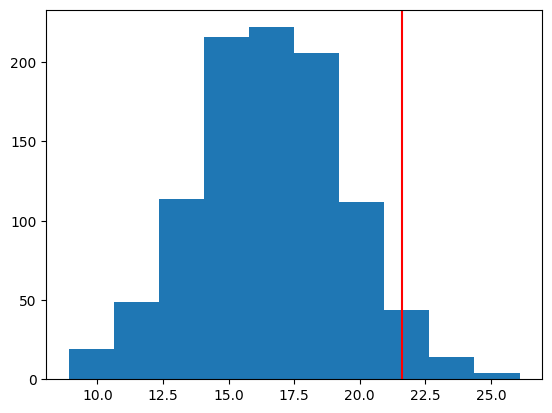

In [11]:
plt.hist(ann_list)
plt.axvline(observed_ann,color='red')

Out observed ANND = 21.6, which is at the vertical line position.

We can count how many times we get more extreme ANND values than observed ANND out of 1,000 random patterns.

In [12]:
p_sim = np.sum(ann_list >= observed_ann)/1000
p_sim

0.039

39 times, so we can get a p-value based on our permutation test which is 0.039. Then you can make your conclusion. Larger ANND indicates regular/dispersed, while smaller ANND indicates clusterd pattern.

So let's repeat this for a clustered pattern. We can use a function called `PoissonClusterPointProcess` to generate some fake clustered patterns. There are several parameters you can change to allow the number of clusters (`parents`) and the size of the cluster (`radius`).

In [60]:
help(PoissonClusterPointProcess)

Help on class PoissonClusterPointProcess in module pointpats.process:

class PoissonClusterPointProcess(PointProcess)
 |  PoissonClusterPointProcess(window, n, parents, radius, samples, keep=False, asPP=False, conditioning=False)
 |  
 |  Poisson cluster point process (Neyman Scott).
 |  Two stages:
 |  1. parent CSR process: :math:`N`-conditioned or
 |  :math:`\lambda`-conditioned. If parent events follow a
 |  :math:`\lambda`-conditioned CSR process,
 |  the number of parent events varies across realizations.
 |  2. child process: fixed number of points in circle centered
 |  on each parent.
 |  
 |  Parameters
 |  ----------
 |  window        : :py:class:`~.window.Window`
 |                  Bounding geometric object to contain point process
 |                  realizations.
 |  n             : int
 |                  Size of each realization.
 |  parents       : int
 |                  Number of parents.
 |  radius        : float
 |                  Radius of the circle centered on

(0.0, 100.0)

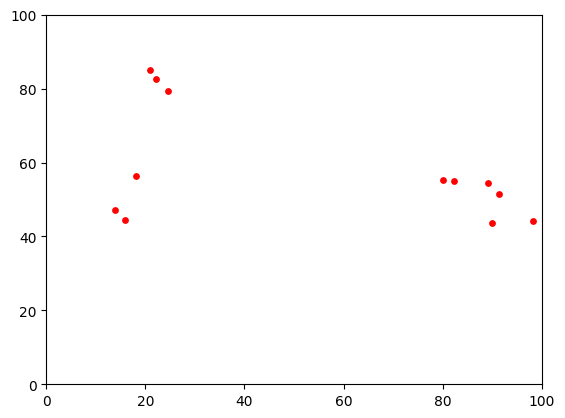

In [61]:
np.random.seed(5)

cluster_samples = PoissonClusterPointProcess(window_square, n=12, parents=4, radius=10, samples=1)
cluster_pp_pcp = cluster_samples.realizations[0]
plt.scatter(cluster_pp_pcp[:,0],cluster_pp_pcp[:,1],s=15,color='red')

plt.xlim(0,100)
plt.ylim(0,100)

In [62]:
cluster_pp = PointPattern(cluster_pp_pcp)
cluster_pp.knn()

(array([[11],
        [ 9],
        [ 5],
        [ 4],
        [ 3],
        [ 8],
        [ 8],
        [ 9],
        [ 6],
        [ 1],
        [11],
        [ 0]]),
 array([[ 3.52626317],
        [ 2.7076444 ],
        [ 8.3107214 ],
        [ 2.21215907],
        [ 2.21215907],
        [ 8.09205158],
        [ 3.66448668],
        [ 4.06939717],
        [ 3.66448668],
        [ 2.7076444 ],
        [10.26761815],
        [ 3.52626317]]))

Our observed ANND for this clusterd pattern

In [57]:
observed_ann = cluster_pp.knn()[1].mean()
observed_ann

4.580074579191797

Lets repeat the same process to generate the sampling distribution of ANND under the CSR assumption.

In [58]:
ann_list = []
np.random.seed(222)
for i in range(1000):
    
    samples = PoissonPointProcess(window_square, 12, 1)
    pp_pcp = samples.realizations[0]
    pp = PointPattern(pp_pcp)
    pp.knn()
    
    ann = pp.knn()[1].mean()
    print(ann)
    
    ann_list.append(pp.knn()[1].mean())


16.153603496988893
16.60721695020759
16.496799534387403
12.677067432312043
17.92217754797706
17.193560243016908
15.239482145856172
16.866946253361384
13.36418697897946
17.805334809987052
14.535324402179262
18.24621629937469
24.495833288526182
18.70454130843852
21.028834092091042
18.00572956040708
15.484101718341273
17.757621457386826
17.93865103061547
17.54574517619859
15.172623531179616
13.394311092734549
13.847340846574513
19.335698432698152
17.972804609803614
15.605408001784488
19.255450206095393
17.8885762449277
24.167032881943147
16.441606470202263
15.024364124713466
19.97759348354239
20.619571347927124
15.012010696122802
18.33714614311167
16.89107615552125
13.218275988883319
15.804375604397533
13.030635584497327
11.42698231645869
17.282512595955303
22.287487058706507
17.627926750796
12.335810916263403
14.276366418880096
16.714788042036712
19.76207311636551
20.640931667620404
14.558645281782816
18.78446724983551
14.930869196992786
16.247229177181584
18.126940703797285
17.164862816

19.461660041906097
13.637414526229785
13.500177563490384
21.5746826712392
16.310259715958576
20.604661293652743
15.161900273579889
19.035968565899307
20.25654558970812
13.136059424716288
13.953438206585451
20.0318732021935
16.07425093948707
18.25562648243911
17.477092996971145
19.774889481330757
13.815335277647643
18.86923142832943
16.53644501414659
14.735401906278115
18.306578100540523
18.006027665638737
19.634070768909208
13.623665715972008
16.254886337350182
16.571584731513557
11.907885062631289
13.417199231725652
18.919736160136356
14.896025345840629
12.493704223966395
15.737442184848526
15.749142359648523
15.777162529424608
16.873255319185787
10.096659810411367
13.616340510582342
18.267891054276273
17.71074794090467
14.319498113669113
16.96918150498183
17.002672492368283
20.26399537901717
18.300003224632423
12.374826057621803
16.510226833451608
20.442400290755625
18.376261867698023
16.028705853035472
15.229764950903123
12.349583978186564
16.42105463737929
12.813804787039572
18.407

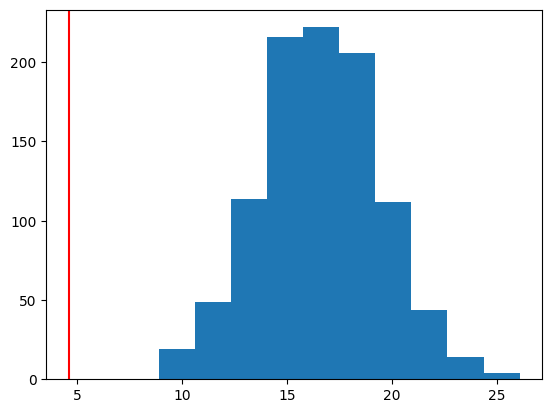

In [59]:
plt.hist(ann_list)
plt.axvline(observed_ann,color='red')

In [64]:
p_sim = np.sum(ann_list <= observed_ann)/1000
p_sim

0.0

We actually have a very small p-value in this case that our oberved ANND is too small that there are no other more extreme cases than that in our simulation.